In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
churndf = pd.read_csv('/Data/churn_customer.csv', delimiter=',')

In [ ]:
churndf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = churndf.iloc[:, 3:13] # Independent Features
y = churndf.iloc[:,13] # Dependant Feature

In [ ]:
# Convert Categorical to Numerical

gender = pd.get_dummies(x['Gender'], drop_first=True) # drop_first is used for prevent the dummy variable tarp
geography = pd.get_dummies(x['Geography'], drop_first=True) # drop_first is used for prevent the dummy variable tarp


In [ ]:
x = pd.concat([x, gender, geography], axis=1)

In [ ]:
# Drop unwanted columns
x = x.drop(['Gender', 'Geography'], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
# Train & test Split

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(x,y, random_state=7, test_size=0.2)

In [ ]:
# Feature Scaling 
# Convert the X_tain, x_test to normal distribution

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
x_test = scalar.transform(x_test)

In [ ]:
# Create a Artificial Neural Netowrk (ANN) - using Keras

from keras.models import Sequential # Base construction for all NN
from keras.layers import Dense # Hidden layer Base
from keras.layers import Dropout # Dropout layer Base


# ANN initializer

ANNClassifier = Sequential()

# Construct the First I/P layer
ANNClassifier.add(Dense(input_dim=11, units=7, kernel_initializer='he_normal', activation='relu'))

# Construct the Hidden Layer
ANNClassifier.add(Dense(units=5, kernel_initializer='he_normal', activation='relu'))

# Construct the o/p layer
ANNClassifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
ANNClassifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

ANNModel = ANNClassifier.fit(X_train, Y_train, validation_split=0.33, batch_size=30, epochs=100)

Epoch 1/100
179/179 [==============================] - 20s 5ms/step - loss: 0.7940 - accuracy: 0.4969 - val_loss: 0.6103 - val_accuracy: 0.7255
Epoch 2/100
179/179 [==============================] - 1s 3ms/step - loss: 0.5805 - accuracy: 0.7666 - val_loss: 0.5291 - val_accuracy: 0.7963
Epoch 3/100
179/179 [==============================] - 1s 3ms/step - loss: 0.5046 - accuracy: 0.8079 - val_loss: 0.5019 - val_accuracy: 0.7963
Epoch 4/100
179/179 [==============================] - 1s 3ms/step - loss: 0.4893 - accuracy: 0.8000 - val_loss: 0.4830 - val_accuracy: 0.7963
Epoch 5/100
179/179 [==============================] - 1s 3ms/step - loss: 0.4788 - accuracy: 0.7967 - val_loss: 0.4678 - val_accuracy: 0.7963
Epoch 6/100
179/179 [==============================] - 1s 3ms/step - loss: 0.4679 - accuracy: 0.7935 - val_loss: 0.4557 - val_accuracy: 0.7963
Epoch 7/100
179/179 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.7985 - val_loss: 0.4457 - val_accuracy: 0.796

In [ ]:
ANNClassifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 84        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


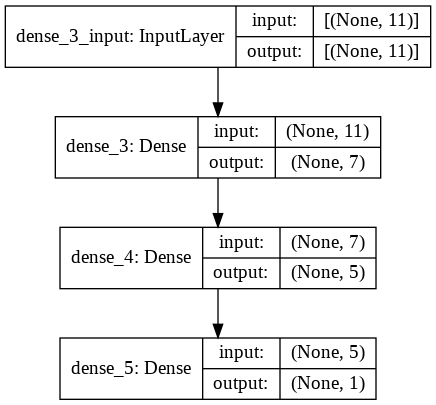

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(ANNClassifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip3 install ann_visualizer
!pip install graphviz

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(ANNClassifier, title="My first neural network", view=True,filename='/content/drive/My Drive/visualize/network.gv')